<a href="https://colab.research.google.com/github/AgiuG/Modelos_de_Regress-o/blob/main/Setembro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Setembro.csv to Setembro.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline

In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Setembro.csv']))
df.head()

,Date,Sales,Populacao,ano,mês
0,1992-09-01,9573,256.9,0,9
1,1993-09-01,10013,260.3,1,9
2,1994-09-01,10217,263.4,2,9
3,1995-09-01,10710,266.6,3,9
4,1996-09-01,10623,269.7,4,9


In [ ]:
df.describe()

,Sales,Populacao,ano,mês
count,28.000000,28.000000,28.000000,28.0
mean,14964.607143,295.803571,13.500000,9.0
std,3516.103739,22.043652,8.225975,0.0
min,9573.000000,256.900000,0.000000,9.0
25%,11881.500000,278.500000,6.750000,9.0
50%,15295.000000,296.950000,13.500000,9.0
75%,18181.000000,314.450000,20.250000,9.0
max,19958.000000,328.200000,27.000000,9.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


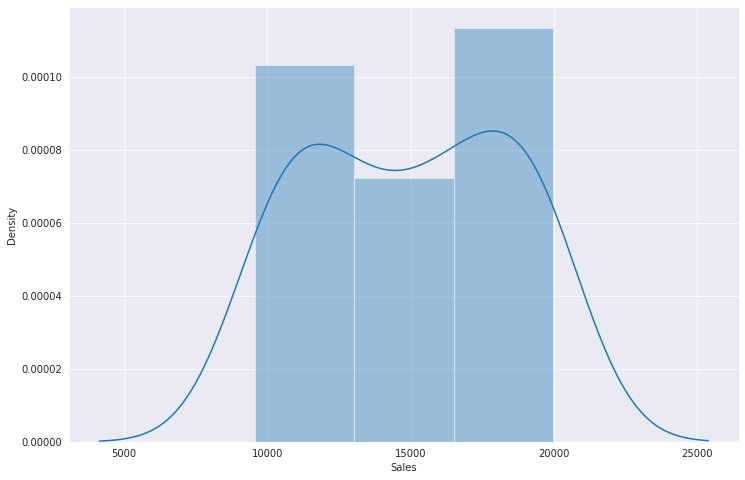

In [ ]:
plt.figure(figsize=(12,8))
sns.set_style('darkgrid')
sns.distplot(df.Sales)

In [ ]:
df.corr()

,Sales,Populacao,ano,mês
Sales,1.000000,0.982382,0.982935,NaN
Populacao,0.982382,1.000000,0.997779,NaN
ano,0.982935,0.997779,1.000000,NaN
mês,NaN,NaN,NaN,NaN


In [ ]:
correlations = df.corr()
correlations['Sales']

Sales        1.000000
Populacao    0.982382
ano          0.982935
mês               NaN
Name: Sales, dtype: float64

In [ ]:
columns = df.columns.drop(['Sales', 'Date', 'mês'])
columns

Index(['Populacao', 'ano'], dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[columns],df['Sales'], test_size=0.20, random_state=42)

In [ ]:
lr = LinearRegression()

In [ ]:
model = lr.fit(X_train,y_train)

In [ ]:
#Realizando a predição
resultado = model.predict(X_test)

In [ ]:
mean_squared_error(y_test, resultado)

341504.66183576727

In [ ]:
model.score(X_test,y_test)

0.9720288805758448

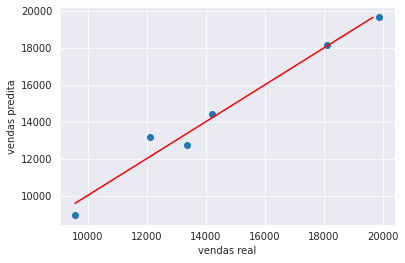

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(y_test, resultado)
range = [y_test.min(), resultado.max()]
plt.plot(range, range, 'red')
plt.xlabel('vendas real')
plt.ylabel('vendas predita')
plt.show()

In [ ]:
resultado_treino = model.predict(X_train)
mean_squared_error(y_train, resultado_treino)

418480.72614793683

In [ ]:
model.score(X_train,y_train)

0.9644794652685463

In [ ]:
tree = DecisionTreeRegressor()

In [ ]:
model_tree = tree.fit(X_train,y_train)
resultado_tree = tree.predict(X_test)

In [ ]:
mean_squared_error(y_test, resultado_tree)

309917.1666666667

In [ ]:
model_tree.score(X_test,y_test)

0.9746160710257067

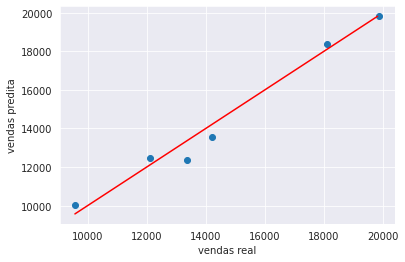

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(y_test, resultado_tree)
range = [y_test.min(), resultado_tree.max()]
plt.plot(range, range, 'red')
plt.xlabel('vendas real')
plt.ylabel('vendas predita')
plt.show()

In [ ]:
tree_rf = RandomForestRegressor()

In [ ]:
model_rf = tree_rf.fit(X_train, y_train)
resultado_rf = model_rf.predict(X_test)

In [ ]:
mean_squared_error(y_test, resultado_rf)

352012.2636

In [ ]:
model_rf.score(X_test,y_test)

0.9711682499120381

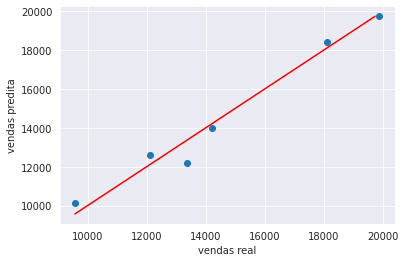

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(y_test, resultado_rf)
range = [y_test.min(), resultado_rf.max()]
plt.plot(range, range, 'red')
plt.xlabel('vendas real')
plt.ylabel('vendas predita')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parametros = {'min_samples_leaf':[1,10],'min_samples_split':[2,10],'n_estimators':[100,250,500,750]}

In [ ]:
rf = RandomForestRegressor()
grid = GridSearchCV(rf, parametros)

In [ ]:
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n

In [ ]:
grid.best_params_

{'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}

In [ ]:
rf_best = grid.best_estimator_

In [ ]:
resultado_final = rf_best.predict(X_test)

In [ ]:
mean_squared_error(y_test, resultado_final)

361633.6731233339

In [ ]:
rf_best.score(X_test,y_test)

0.9703802032910661

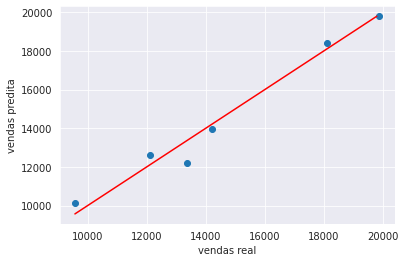

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(y_test, resultado_final)
range = [y_test.min(), resultado_final.max()]
plt.plot(range, range, 'red')
plt.xlabel('vendas real')
plt.ylabel('vendas predita')
plt.show()